<a href="https://colab.research.google.com/github/DikshaGul/Diksha-Gulati/blob/main/SeeColorsDay5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving 2024-08-29.png to 2024-08-29.png


(np.float64(-0.5), np.float64(1365.5), np.float64(767.5), np.float64(-0.5))

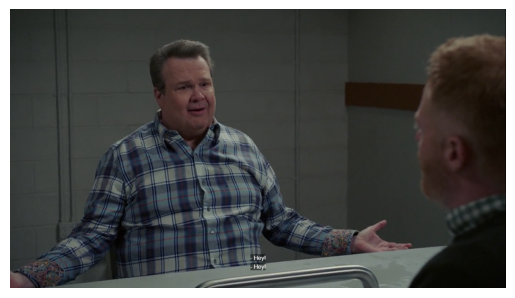

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(list(uploaded.keys())[0])
plt.imshow(img)
plt.axis('off')


In [4]:
import numpy as np

x = 50
y = 50

pixel = np.array(img)[y, x]
pixel


array([ 38,  43,  40, 255], dtype=uint8)

I've loaded a random image , the program takes input , save the image and gets the RGB , later I'm gonna work with providing exact names and matching the grade to make the colours acesible to the colourblinds.

In [5]:
!pip install webcolors

import webcolors


In [6]:
print("Pixel from Day 1:", pixel)


Pixel from Day 1: [ 38  43  40 255]


In [7]:
def closest_color(rgb):
    rgb = rgb[:3]

    min_distance = float('inf')
    closest_name = None


    for name in webcolors.names("css3"):
        r_c, g_c, b_c = webcolors.name_to_rgb(name)
        distance = (r_c - rgb[0])**2 + (g_c - rgb[1])**2 + (b_c - rgb[2])**2

        if distance < min_distance:
            min_distance = distance
            closest_name = name

    return closest_name


In [8]:
color_name = closest_color(pixel)
print("RGB:", pixel[:3])
print("Closest Color Name:", color_name)


RGB: [38 43 40]
Closest Color Name: wheat


/tmp/ipython-input-3955635234.py:10: RuntimeWarning: overflow encountered in scalar add
  distance = (r_c - rgb[0])**2 + (g_c - rgb[1])**2 + (b_c - rgb[2])**2
/tmp/ipython-input-3955635234.py:10: RuntimeWarning: overflow encountered in scalar subtract
  distance = (r_c - rgb[0])**2 + (g_c - rgb[1])**2 + (b_c - rgb[2])**2


Till now SeeColors is able to

1.   Get the image from user
2. Extract pixel-level RGB values from the image

1.   Convert RGB values into nearest CSS3 color names

TECH STACK

1.   Python
- NumPy
- PIL (Pillow)
- Matplotlib
- WebColors
- Google Colab

 Planned Improvements

- Extract dominant colors from images
- Color palette visualization
- Color-blind accessibility mode
- Web-based interface
- Integration into a personal portfolio website

Status
Actively under development (daily updates)














In [9]:
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(1365.5), np.float64(767.5), np.float64(-0.5))

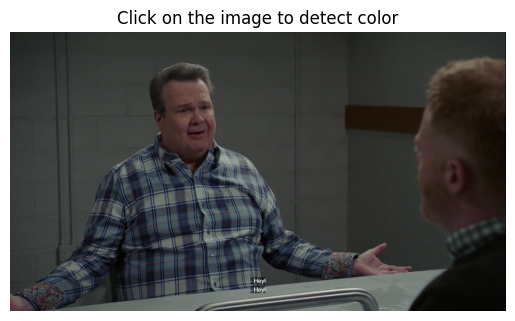

In [10]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title("Click on the image to detect color")
ax.axis("off")


In [11]:
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x = int(event.xdata)
        y = int(event.ydata)


In [12]:
        clicked_pixel = np.array(img)[y, x][:3].astype(int)


In [13]:
        color_name = closest_color(clicked_pixel)


In [14]:
        print(f"Clicked at (x={x}, y={y})")
        print("RGB:", clicked_pixel)
        print("Closest Color Name:", color_name)
        print("-" * 40)


Clicked at (x=50, y=50)
RGB: [38 43 40]
Closest Color Name: darkslategray
----------------------------------------


In [15]:
cid = fig.canvas.mpl_connect("button_press_event", onclick)
plt.show()

Implemented click-based color detection

Enabled dynamic RGB extraction from images

Improved usability and accessibility focus

In [16]:
from sklearn.cluster import KMeans

In [17]:
small_img = img.resize((150, 150))

In [18]:
import numpy as np

In [19]:
pixels = np.array(small_img)
pixels = pixels.reshape(-1, 3)

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixels)

dominant_colors = kmeans.cluster_centers_.astype(int)
dominant_colors


array([[ 51,  52,  51],
       [ 51,  50, 255],
       [255,  55,  56],
       [ 55, 255,  54],
       [124, 125, 192]])

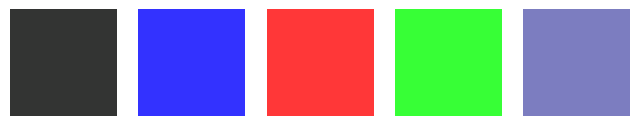

In [21]:
plt.figure(figsize=(8, 2))

for i, color in enumerate(dominant_colors):
    plt.subplot(1, 5, i + 1)
    plt.imshow([[color]])
    plt.axis("off")

plt.show()

In [22]:
for color in dominant_colors:
    name = closest_color(color)
    print(f"RGB: {color} → Closest Color Name: {name}")


RGB: [51 52 51] → Closest Color Name: darkslategray
RGB: [ 51  50 255] → Closest Color Name: royalblue
RGB: [255  55  56] → Closest Color Name: tomato
RGB: [ 55 255  54] → Closest Color Name: limegreen
RGB: [124 125 192] → Closest Color Name: mediumpurple


In [1]:
def luminance(rgb):
    r, g, b = rgb / 255.0
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

In [23]:
def contrast_ratio(color_a, color_b):
    L1 = luminance(color_a)
    L2 = luminance(color_b)

    lighter = max(L1, L2)
    darker = min(L1, L2)

    return (lighter + 0.05) / (darker + 0.05)

In [24]:
print("Accessibility contrast check between dominant colors:\n")

for i in range(len(dominant_colors)):
    for j in range(i + 1, len(dominant_colors)):
        ratio = contrast_ratio(dominant_colors[i], dominant_colors[j])

        if ratio < 4.5:
            print(
                f"Low contrast: "
                f"{closest_color(dominant_colors[i])} & "
                f"{closest_color(dominant_colors[j])} "
                f"(ratio: {ratio:.2f})"
            )

Accessibility contrast check between dominant colors:

Low contrast: darkslategray & royalblue (ratio: 1.21)
Low contrast: darkslategray & tomato (ratio: 1.71)
Low contrast: darkslategray & limegreen (ratio: 3.27)
Low contrast: darkslategray & mediumpurple (ratio: 2.21)
Low contrast: royalblue & tomato (ratio: 1.42)
Low contrast: royalblue & limegreen (ratio: 2.71)
Low contrast: royalblue & mediumpurple (ratio: 1.83)
Low contrast: tomato & limegreen (ratio: 1.91)
Low contrast: tomato & mediumpurple (ratio: 1.29)
Low contrast: limegreen & mediumpurple (ratio: 1.48)


- Analyzes color contrast between dominant colors
- Identifies low-contrast combinations using accessibility standards